<center><h1>Gradient descent implementation</h1></center>

Source of the dataset: [kaggle dataset](https://www.kaggle.com/unsdsn/world-happiness)

Source of the photos: [gradient descent explanation](http://mccormickml.com/2014/03/04/gradient-descent-derivation/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataset = pd.read_csv("2017.csv")

In [3]:
dataset.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


    Dependace of happiness and GDP seems quite interesting. Let's change the names of these variables for the sake of convenience.

In [4]:
dataset = dataset.rename(columns={"Happiness.Score":"Happiness Score","Economy..GDP.per.Capita.":"GDP per Capita"})

In [5]:
dataset.head()

,Country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,GDP per Capita,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


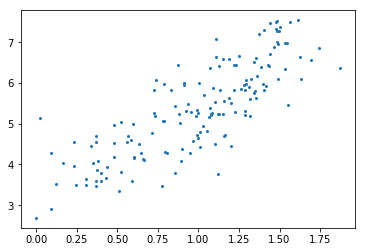

In [6]:
plt.scatter(dataset['GDP per Capita'],dataset['Happiness Score'],s = 4)

    There is a clear dependance between two given variables so let's run a gradient descent on it

    First, let's write a required code for gradient descent

<b>Gradient descent</b>

    I will train the gradient decent on World Happiness Report dataset(link given on top) .

    I have chosen two variables according to rules from Siraj the week's coding challenge

    equation: y = ax + b - general equation for a linear regression problem

    Cost function of a linear regression model - mean squared error(MSE)
<img src="mse_cost_eq1.png">

<img src="mse_variable_descriptions.png" style = "width: 550px">

    First, I need to maximise a and b, so I need to look for a partial derivative with respect to b and m (to perform gradient descent)

<img src="linear_regression_gradient1.png" style="width: 300px">

In [7]:
# necessary libraries
import numpy as np
import matplotlib as mpl

# gradient descent function
def gradient_descent_step(m_current,b_current,dataset,var1,var2,learning_rate):
    data1 = dataset[var1]
    data2 = dataset[var2]
    m_gradient = 0
    b_gradient = 0
    n = len(dataset)
    cost = 0
    for i in range(n):
        x = dataset[var1].iloc[i]
        y = dataset[var2].iloc[i]
        m_gradient += learning_rate*(-2/n * x * (y - ( m_current * x + b_current)))
        b_gradient += learning_rate*(-2/n * (y - (m_current * x + b_current)))
    new_m = m_current - m_gradient
    new_b = b_current - b_gradient
    return new_m, new_b  

# function which calculated mean squared error
def mean_squared_error(dataset,x_var,y_var,m_coef,b_coef):
    return 1/len(dataset)*np.sum((dataset[y_var]-(m_coef*dataset[x_var]+b_coef))**2)

# function which finds the best solution of gradient descent
def optimize(num_iter,m_start,b_start,dataset,var1,var2,learning_rate):
    i = 0
    new_m = m_start
    new_b = b_start
    domain = np.linspace(0,10,11) # the arbitrary domain
    plt.style.use('ggplot')
    while i < num_iter:
        new_m, new_b = gradient_descent_step(new_m,new_b,dataset,var1,var2,learning_rate)
        i += 1
        
        plt.xlim(0,2)
        plt.ylim(2,8)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title('Gradient descent')
        plt.text(0.125,7.3,"m coefficient = "+np.str(round(new_m,2)))
        plt.text(0.125,6.8,"b coefficient = "+np.str(round(new_b,2)))
        plt.text(0.125,6.3,"learning rate = "+np.str(learning_rate))
        plt.text(0.125,5.8,"cost = "+np.str(round(mean_squared_error(dataset,var1,var2,new_m,new_b),4)))
        plt.text(0.125,5.3,"iteration = "+np.str(i))
        plt.scatter(dataset[var1],dataset[var2], s= 2)
        plt.plot(domain*new_m+new_b,color = 'blue')
        plt.savefig("grad_visualisation/grad"+np.str(i)+".png")
        plt.clf()
    return new_m, new_b

In [8]:
a,b = optimize(10,0,0,dataset,'GDP per Capita','Happiness Score',0.1)

<img src="gradient_descent.gif">

Finally after 260 iterations the minimum was reached.